# PyTorch 学習済みモデル(torchvison.models)を使って、画像分類(ImageNet 1000class)
https://pytorch.org/docs/stable/torchvision/models.html

In [62]:
import torch
import torch.nn.functional as F
import torchvision
from torchvision import datasets, models, transforms

In [2]:
import json
import numpy as np
from PIL import Image

## PyTorch Load Model
https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html#initialize-and-reshape-the-networks

In [15]:
def initialize_model(model_name, use_pretrained=True):
    model = None
    input_size = 0
    if model_name == "resnet":
        model = models.resnet18(pretrained=use_pretrained)
        input_size = 224
    elif model_name == "alexnet":
        model = models.alexnet(pretrained=use_pretrained)
        input_size = 224
    elif model_name == "vgg":
        model = models.vgg11_bn(pretrained=use_pretrained)
        input_size = 224
    elif model_name == "squeezenet":
        model = models.squeezenet1_0(pretrained=use_pretrained)
        input_size = 224
    elif model_name == "densenet":
        model = models.densenet121(pretrained=use_pretrained)
        input_size = 224
    elif model_name == "inception":
        model = models.inception_v3(pretrained=use_pretrained)
        input_size = 299
    else:
        print("Invalid model name, exiting...")
        exit()
    return model, input_size

## Load Model

In [20]:
# Models to choose from [resnet, alexnet, vgg, squeezenet, densenet, inception]
model_name = "vgg"
# Load model
model, input_size = initialize_model(model_name, use_pretrained=True)
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace)
    (14): MaxPool2d(kernel_size=2, stride=

In [21]:
# Print the model we just instantiated
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace)
    (14): MaxPool2d(kernel_size=2, stride=

In [53]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

data_transforms = transforms.Compose([
                    #transforms.Resize(input_size + 32),
                    transforms.Resize(input_size),
                    transforms.CenterCrop(input_size),
                    transforms.ToTensor(),
                    normalize
                    ])

img_transforms = transforms.Compose([
                    #transforms.Resize(input_size + 32),
                    transforms.Resize(input_size),
                    transforms.CenterCrop(input_size)
                    ])

In [54]:
img = Image.open('./image/elephant.jpg')
img_tensor = data_transforms(img)
print(img_tensor.shape)

torch.Size([3, 224, 224])


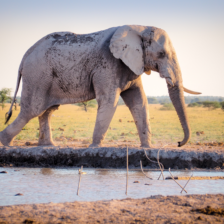

In [55]:
img_transforms(img)

In [56]:
img_tensor.unsqueeze_(0)
print(img_tensor.size())

torch.Size([1, 3, 224, 224])


## imagenet_class_index

In [60]:
class_index = json.load(open('imagenet_class_index.json', 'r'))
class_index

{'0': ['n01440764', 'tench'],
 '1': ['n01443537', 'goldfish'],
 '2': ['n01484850', 'great_white_shark'],
 '3': ['n01491361', 'tiger_shark'],
 '4': ['n01494475', 'hammerhead'],
 '5': ['n01496331', 'electric_ray'],
 '6': ['n01498041', 'stingray'],
 '7': ['n01514668', 'cock'],
 '8': ['n01514859', 'hen'],
 '9': ['n01518878', 'ostrich'],
 '10': ['n01530575', 'brambling'],
 '11': ['n01531178', 'goldfinch'],
 '12': ['n01532829', 'house_finch'],
 '13': ['n01534433', 'junco'],
 '14': ['n01537544', 'indigo_bunting'],
 '15': ['n01558993', 'robin'],
 '16': ['n01560419', 'bulbul'],
 '17': ['n01580077', 'jay'],
 '18': ['n01582220', 'magpie'],
 '19': ['n01592084', 'chickadee'],
 '20': ['n01601694', 'water_ouzel'],
 '21': ['n01608432', 'kite'],
 '22': ['n01614925', 'bald_eagle'],
 '23': ['n01616318', 'vulture'],
 '24': ['n01622779', 'great_grey_owl'],
 '25': ['n01629819', 'European_fire_salamander'],
 '26': ['n01630670', 'common_newt'],
 '27': ['n01631663', 'eft'],
 '28': ['n01632458', 'spotted_salama

In [65]:
labels = {int(key):value for (key, value) in class_index.items()}
print(labels[0])   # ['n01440764', 'tench']

['n01440764', 'tench']


## Predict

In [114]:
out = F.softmax(model(torch.autograd.Variable(img_tensor)), dim=1).data.numpy().reshape(-1)

## Top 10 Report

In [180]:
outarg = np.argsort(out)[::-1]
n = 10
for i in range(n):
    print('{:>2} {:>3} {} {:<16} {:>16.12%}'.format(i+1, outarg[i], labels[outarg[i]][0], labels[outarg[i]][1], out[outarg[i]]))

 1 386 n02504458 African_elephant 56.289702653885%
 2 101 n01871265 tusker           40.392664074898%
 3 385 n02504013 Indian_elephant   3.265541791916%
 4 354 n02437312 Arabian_camel     0.032308197115%
 5  51 n01704323 triceratops       0.014489951718%
 6 344 n02398521 hippopotamus      0.001116024578%
 7 346 n02408429 water_buffalo     0.000674067996%
 8 246 n02109047 Great_Dane        0.000444668331%
 9 649 n03743016 megalith          0.000438766256%
10  48 n01695060 Komodo_dragon     0.000338219388%
